This module will focus on Learning XOR which will not be able to be done in normal machine learning, it has to be performed with hidden layer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Epoch 0, Loss: 0.7983
Epoch 10000, Loss: 0.6841
Epoch 20000, Loss: 0.6017
Epoch 30000, Loss: 0.4742
Epoch 40000, Loss: 0.2582
Epoch 50000, Loss: 0.0930
Epoch 60000, Loss: 0.0510
Epoch 70000, Loss: 0.0344
Epoch 80000, Loss: 0.0258
Epoch 90000, Loss: 0.0205
Final outputs after training:
[[0.01936749]
 [0.98467491]
 [0.9844651 ]
 [0.01726293]]


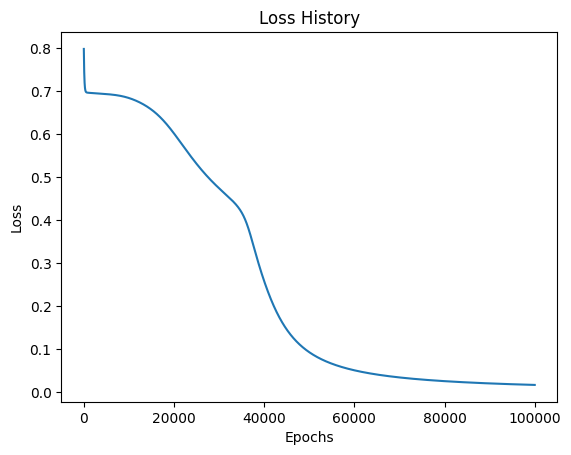

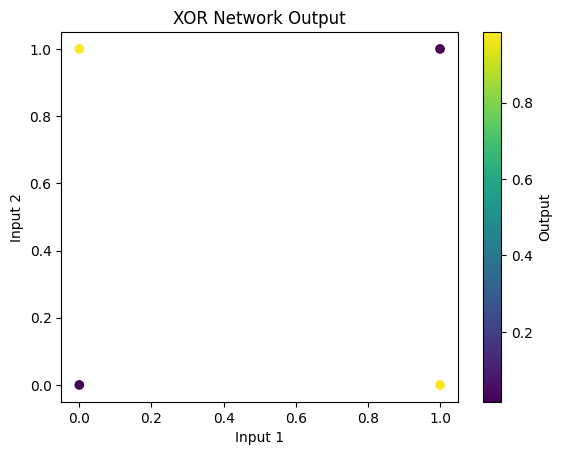

In [4]:
### XOR datasets
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

### Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

### Initialize parameters
np.random.seed(42)
w1 = np.random.randn(2,2)
b1 = np.random.randn(1,2)
w2 = np.random.randn(2,1)
b2 = np.random.randn(1,1)

lr = 0.01
n_epochs = 100000
loss_history = []

for epoch in range(n_epochs):
    z1 = np.dot(x, w1) + b1 ### Output of hidden layer
    a1 = sigmoid(z1) ### Activation of hidden layer
    z2 = np.dot(a1, w2) + b2 ### Output of output layer
    a2 = sigmoid(z2) ### Activation of output layer

    # Compute loss (Binary Cross-entropy)
    loss = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))
    loss_history.append(loss)

    # Backpropagation
    dz2 = a2 - y ### Derivative of loss with hidden layer output z2. This formula is derived from BCE loss and sigmoid activation. Compute dL/Da first, then da/dz. 
    dw2 = np.dot(a1.T, dz2) / len(x) ### Average over all samples of the input features multiplied by the error of the output layer
    db2 = np.sum(dz2, axis=0, keepdims=True) / len(x) ### Average over all samples of the error of the output layer

    dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(a1) ### Backprop the output error (dz2) through the output weights (w2), then multiply by the derivative of the activation function
    dw1 = np.dot(x.T, dz1) / len(x) ### Average over all samples of the input features multiplied by the error of the hidden layer
    db1 = np.sum(dz1, axis=0, keepdims=True) / len(x) ### Average over all samples of the error of the hidden layer

    # Update weights and biases
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2

    if epoch % 10000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final output
print("Final outputs after training:")
z1 = np.dot(x, w1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, w2) + b2
a2 = sigmoid(z2)
print(a2)

### Plot loss history
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

# Plot the results
plt.scatter(x[:,0], x[:,1], c=a2, cmap='viridis')
plt.colorbar(label='Output')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Network Output')
plt.show()